<a href="https://colab.research.google.com/github/Rogerio-mack/Hackathon-Itau-Mackenzie/blob/main/E2_TimeSeriesARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

### 𝟮𝟭.𝟬𝟰 𝗤𝘂𝗶 𝟮𝟭:𝟬𝟬𝗵 𝗮̀𝘀 𝟮𝟮:𝟬𝟬𝗵 
# **ARIMA Aplicando Modelos de Autoregressão para Séries Temporais**

Aplicação e avaliação de modelos Arima simples com Python e o pacote statsmodel.

*Mackenzie EE Prof. Orlando Albarracin*

<br>

<br>

___


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Conceitos importantes 
Os modelos Autoregressive Integrated Moving Average (ARIMA) fornecem uma abordagem para a previsão de séries temporais visando a descrever as autocorrelações nos dados. Antes de introduzirmos os modelos ARIMA, devemos primeiro discutir o conceito de estacionariedade e a técnica de diferenciação de séries temporais.

In [ ]:
# Séries temporais
df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações") #IBGE - Trimestral
df2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar") #Economial UOL - diária
df3=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Vendas") #IBGE - mensal

## Estacionariedade

A média e a variância de **processos estacionários** são constantes ao longo do tempo, intuitivamente isto significa que as observações se desenvolvem aleatoriamente entorno de um certo nível com variabilidade constante.


### Exemplo.

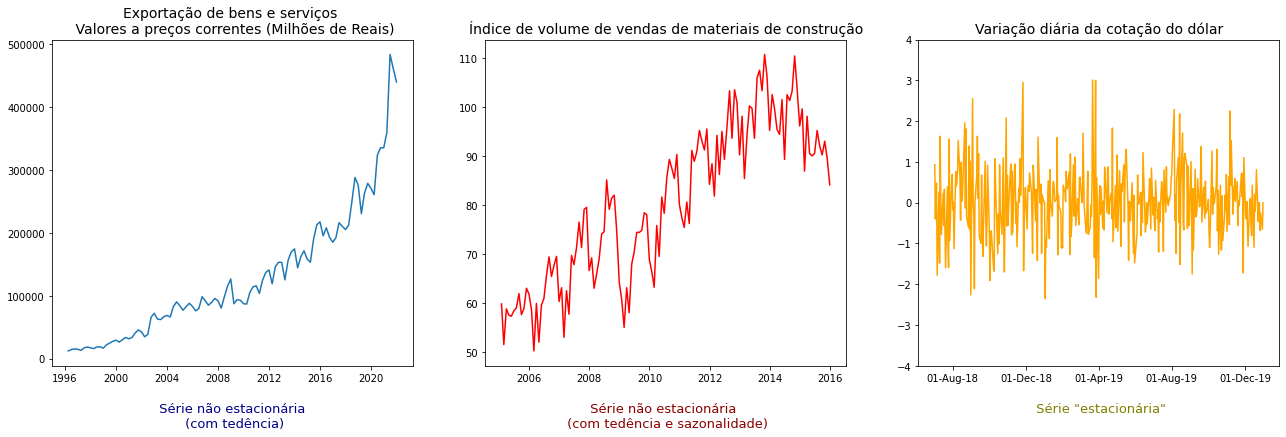

In [ ]:
#@markdown Gráfico das séries
import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='3/1/1996', end='12/31/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')
index_dates3 = pd.date_range(start='1/1/2005', end='12/31/2015', freq='M')

df1.index=index_dates1
df2.index=index_dates2
df3.index=index_dates3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(22,6))
ax1.plot(df1.index, df1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)',fontdict = {'fontsize' : 14})
ax1.set_xlabel('\n Série não estacionária \n (com tedência)',fontdict = {'fontsize' : 13},color="darkblue")

ax2.plot(df3.index, df3["volume_vendas"], c='r')
ax2.set_title('Índice de volume de vendas de materiais de construção',fontdict = {'fontsize' : 14})
ax2.set_xlabel('\n Série não estacionária  \n (com tedência e sazonalidade)',fontdict = {'fontsize' : 13},color="darkred")


ax3.plot(df2.index.to_pydatetime(), df2["Var"], c='orange')
ax3.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax3.set_title('Variação diária da cotação do dólar',fontdict = {'fontsize' : 14})
ax3.set_xlabel('\n Série "estacionária"',fontdict = {'fontsize' : 13},color="olive")

ax3.set_ylim([-4, 4]);


## Função de autocorrelação

No processo de identificação de modelos ARIMA, a análise da estrutura de dependência serial dos dados é fundamental. Em algumas séries, observa-se que o valor atual está correlacionado com seus valores passados e a força dessa dependência diminui quando considerados valores mais distantes no tempo ("lags").


A função de autocorrelacão (ACF) permite visualizar as correlaçãoes entre observações distantes k períodos de tempo. Assim, para um "lag=1" representa-se como valores sucessivos da série estão correlacionados. Cabe ressaltar que para um "lag=0" o valor da correlação sempre será um, por que?

Na função de autocorrelação amostral intervalos de confiança de 95% são traçados para verificar se as autocorrelações são significativamente diferentes de zero.

**Observação!** Recomenda-se analisar o ACF de **série estacionárias**. As séries **não estacionárias** possuem um ACF com decaimento muito lento e não é possível analisar seus valores.

### **Exemplo**. 
A seguir apresenta-se o ACF de uma série (simulada) cujos valores sucessivos estão correlacionados. A série foi gerada de tal forma que a correlação entre o valor no instante $t$ e $t-1$ seja de $0,7$. Note que a correlação da série no instate $t$ e $t-k$ diminuiu quando $k$ aumenta, i.e, quando analisamos a correlação da série no instante $t$ com valores mais distantes no tempo. Faz sentido, não?

In [ ]:
#@markdown Simulando uma série com valores sucessivos autocorrelacionados
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_process import ArmaProcess
ar1 = np.array([1,-0.7])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1,ma1)
simulated_data = AR_object1.generate_sample(nsample=1000);


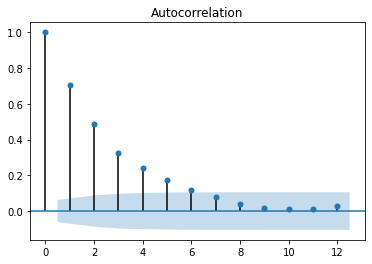

In [ ]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
x=plot_acf(simulated_data, lags=12)

Note que a correlação que considera valores sucessivos ($Z_t$ e $Z_{t-1}$, ou seja, $lag=1$) é de 0,7 e essas correlações decaem exponencialmente quando analisadas as associações entre valores mais distantes. Observa-se que para valores "muito" distantes no tempo (lags >7) a correlação é zero estatísticamente falando.

### Função de autocorrelação parcial (PACF)

As autocorrelações parciais são usadas para medir o graus de associação entre $Z_{t}$ e $Z_{t-k}$, quando os efeitos das outras defasagens são removidos.

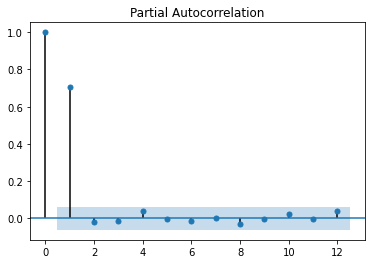

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
x=plot_pacf(simulated_data, lags=12);

Obseva-se que somente a correlação do lag=1 é significativamente diferente de zero, ou seja, para tentar entender o valor da série no instante $"t"$ podemos usar a informação contida no instante $"t-1"$.

## Diferenciação

Muitas séries analisadas na prática são não estacionárias, mas ao tomarmos algumas diferenças a série se torna estacionária.  Tomando-se uma diferença elimina-se uma tendência linear. 




Seja $Z_t$ o valor da série no instante $t$. A primeira diferença é dada por:

$$ \Delta Z_t = Z_t -Z_{t-1} $$

Em geral, tomar uma ou duas diferenças é suficiente para eliminar tendências da série e torná-la estacionária.

Quando a série é sazonal  é apropriado tomar as diferenças para o período de
sazonalidade. Considere o caso de uma série mensal cujos valores apresentam um comportamento períodico que se repete a cada ano. Assim, recomenda-se tomar uma diferença sazonal

$$ \Delta Z_t = Z_t -Z_{t-12} $$


### Exemplo (eliminar a tendência)

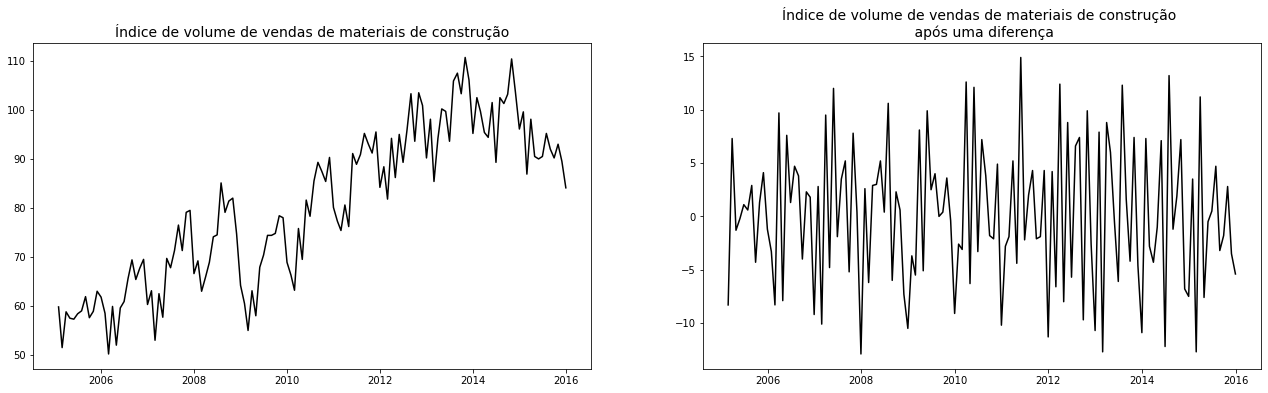

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(22,6))

# Série original
ax1.plot(df3.index, df3["volume_vendas"],color="black")
ax1.set_title('Índice de volume de vendas de materiais de construção',fontdict = {'fontsize' : 14})

# Série diferenciada
ax2.plot(df3.index, df3["volume_vendas"].diff(),color="black")
ax2.set_title('Índice de volume de vendas de materiais de construção \n após uma diferença',fontdict = {'fontsize' : 14})

plt.show()

Note que após uma diferença eliminou-se a tendência da série.

# Ajustando um modelo ARIMA
Os modelos ARIMA permitem modelar processos chamados de não estacionários homogêneos, denotado por ARIMA(p,d,q), em d indica o número de diferenças necessárias para que a série se torne estacionária, p é o número total de termos defasados $(Z_{t-1}, Z_{t-2},...,Z_{t-p})$ da série que que influenciam no instante $t$ (parte Autorregressiva (AR) do modelo), e $q$ o número total de termos defasados de erros aleatórios $(e_{t-1}, e_{t-2},...,e_{t-q})$ correspondente à parte de Médias móveis (MA), sua interpretação é menos intuitiva.


$$\underbrace{\Delta^d Z_t}_\text{Série após d diferenças} =\mu+ \underbrace{\phi_1 \Delta^dZ_{t-1}+ \phi_2\Delta^dZ_{t-2}+...+\phi_p\Delta^d Z_{t-p}}_\text {Autorregressiva (AR)} + e_t + \underbrace{\theta_1e_{t-1}+ \theta_2 e_{t-2}+...+ \theta_q e_{t-q}}_\text{Médias móveis (MA)}, $$

em que $\phi_1,...,\phi_p, \theta_1,...,\theta_q$ são valores a serem estimados. Geralmente $e_t \sim N (0,\sigma^2)$.

## Pasos a serem considerados quando ajustamos um modelo ARIMA

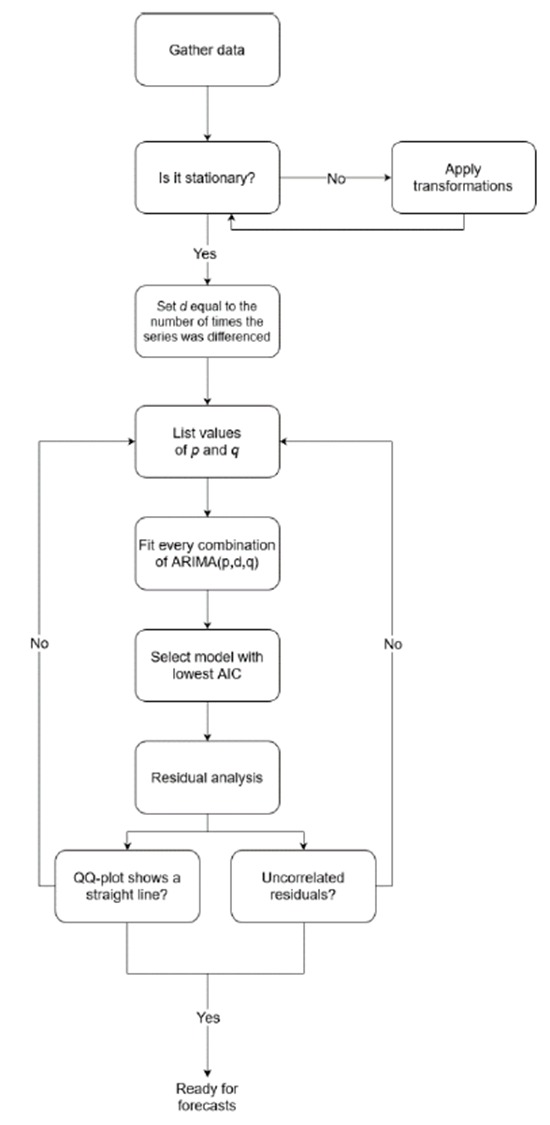

## Exemplo 1

In [ ]:
#@markdown Bibliotecas 

import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
import statsmodels.api as qqplot
import scipy.stats as stats

In [ ]:
#PREÇOS MÉDIOS NOMINAIS MENSAIS DE VENDA NO ATACADO, NO PARANÁ – 1995-2019
# ÓLEO DE SOJA REFINADO (20 unidades)
df=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/series_ole_soja.xlsx") #www.agricultura.pr.gov.br
df.head()

,ano,mês,valor
0,1997,janeiro,15.17
1,1997,fevereiro,15.49
2,1997,março,15.73
3,1997,abril,15.56
4,1997,maio,15.65


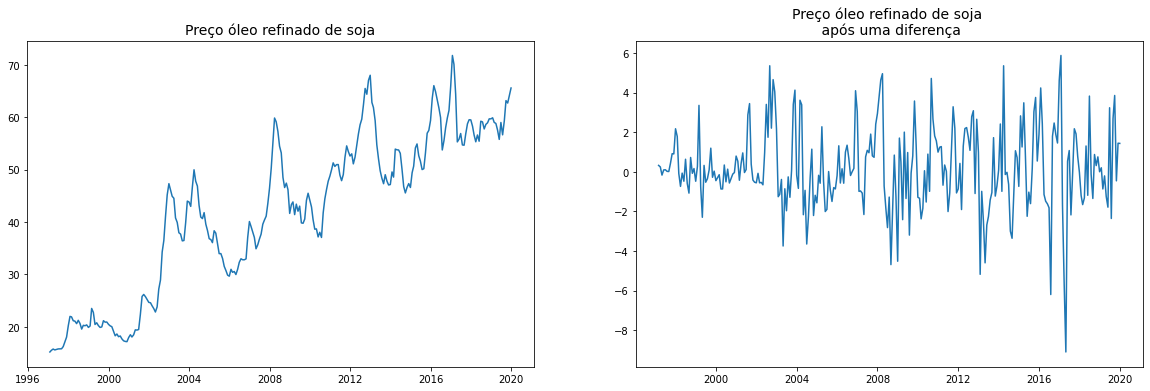

In [ ]:
# Arrumando o eixo-x (série mensal)
index_data = pd.date_range(start='1/1/1997', end='12/31/2019', freq='M')
df.index=index_data

# Gráficos
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(df.index, df.valor)
ax1.set_title('Preço óleo refinado de soja',fontdict = {'fontsize' : 14})

ax2.plot(df.index, df.valor.diff())
ax2.set_title('Preço óleo refinado de soja \n após uma diferença',fontdict = {'fontsize' : 14})

plt.show()

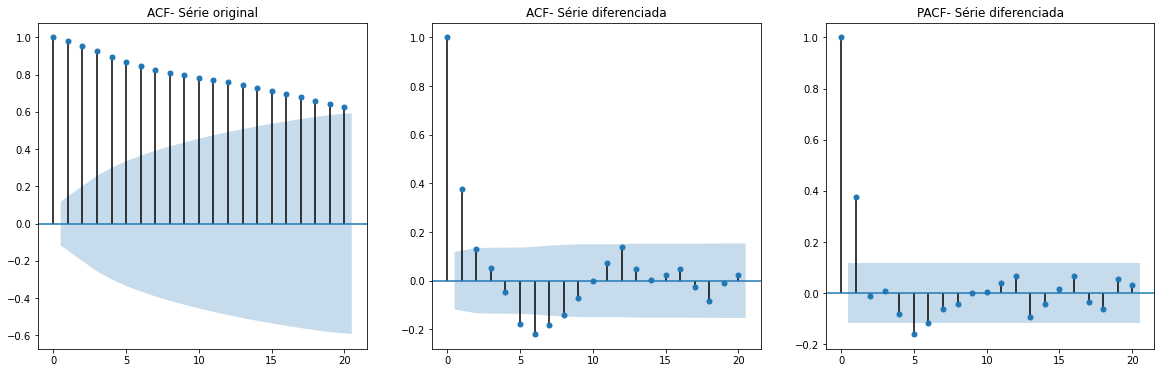

In [ ]:
# Analisando o ACF

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))

y=plot_acf(df.valor, lags=20, ax=ax1, title="ACF- Série original")
y1=plot_acf(df.valor.diff().dropna(), lags=20, ax=ax2, title="ACF- Série diferenciada")
y2=plot_pacf(df.valor.diff().dropna(),ax=ax3, lags=20, title="PACF- Série diferenciada");

Nota-se o ACF da série original apresenta um decrescimento lento, comportamento esperado uma vez que a série não é estacionária. No gráfico de PACF observa-se que seria interessante considerar no modelo a informação defassada dos lags (lag =1 e lag=5) uma vez que são estatísticamente diferente de zero.

In [ ]:
# Ajustando o modelo ARIMA
model_1=ARIMA(df.valor, order=(5, 1, 0)) # p=5, d=1, q=0
res=model_1.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.valor   No. Observations:                  275
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -563.646
Method:                       css-mle   S.D. of innovations              1.878
Date:                Thu, 21 Apr 2022   AIC                           1141.293
Time:                        20:32:32   BIC                           1166.610
Sample:                    02-28-1997   HQIC                          1151.453
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1797      0.145      1.238      0.217      -0.105       0.464
ar.L1.D.valor     0.3678      0.059      6.188      0.000       0.251       0.484
ar.L2.D.valor    -0.0112      0.063     

Nota-se que somente os valores referentes a $Z_{t-1}$ e $Z_{t-5}$ são significativos (ver o valor-p)

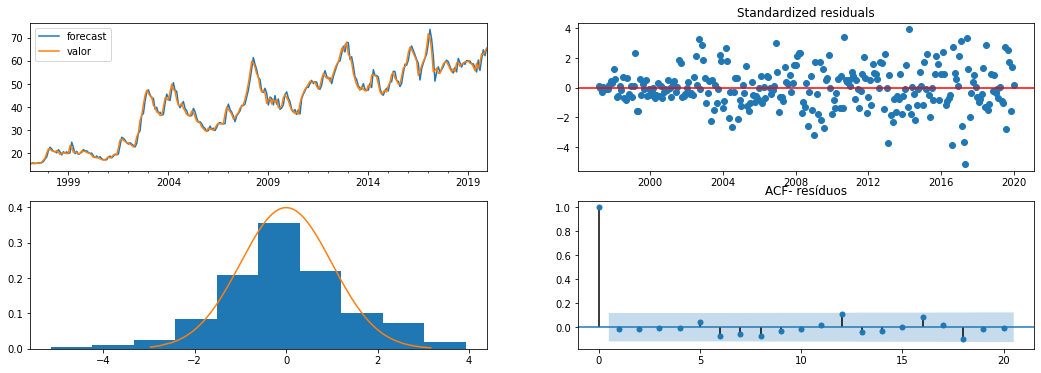

In [ ]:
#@markdown Arima - Gráficos do ajuste
fig,axs = plt.subplots(2, 2,figsize=(18,6))

#axs[0,0].plot(res.predict(typ='levels'),color="red")
#axs[0,0].plot(df.valor,color="blue")
res.plot_predict(dynamic=False, ax=axs[0,0])

axs[0,1].scatter(df.index[1:len(df)],(res.resid-res.resid.mean())/np.sqrt(res.resid.std())) #standardized residuals
axs[0,1].axhline(y=0, color='r', linestyle='-')

axs[0,1].set_title('Standardized residuals')

axs[1,0].hist((res.resid-res.resid.mean())/np.sqrt(res.resid.std()), density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))

x=plot_acf(res.resid, lags=20, ax=axs[1,1], title="ACF- resíduos");
#x1=plot_pacf(res.resid, lags=20, ax=axs[1,1], title="PACF- resíduos")

Nota-se que os resíduos seguem, aproximadamente, uma distribuição normal e são independentes, isto é, toda a informação passada da série foi modelada (ver ACF).

### Treinamento e teste

Vamos considerar o último ano da série para verificar a acuracia do modelo

In [ ]:
# Ajustando o modelo ARIMA (treinamento)

a=len(df)-12
train = df.valor[:a]
test = df.valor[a:]

model_1=ARIMA(train, order=(5, 1, 0))
res=model_1.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.valor   No. Observations:                  263
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -536.362
Method:                       css-mle   S.D. of innovations              1.859
Date:                Thu, 21 Apr 2022   AIC                           1086.724
Time:                        20:32:33   BIC                           1111.729
Sample:                    02-28-1997   HQIC                          1096.772
                         - 12-31-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1697      0.149      1.137      0.257      -0.123       0.462
ar.L1.D.valor     0.4006      0.061      6.615      0.000       0.282       0.519
ar.L2.D.valor    -0.0275      0.065     

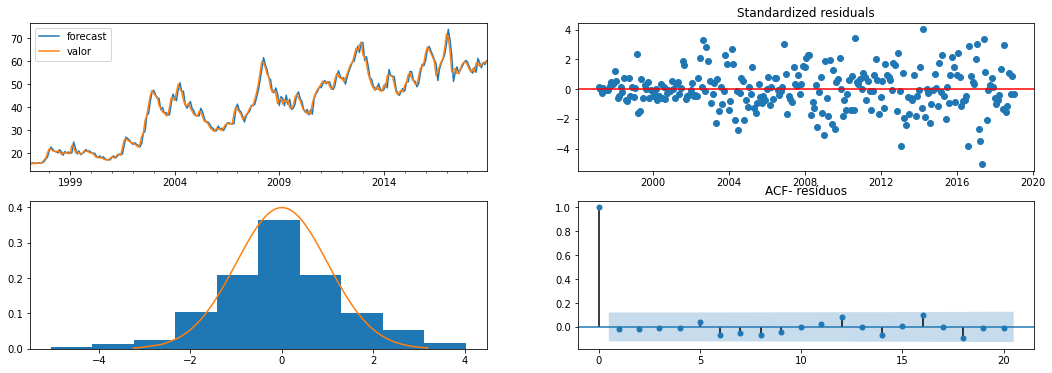

In [ ]:
#@markdown Arima - Gráficos do ajuste
fig,axs = plt.subplots(2, 2,figsize=(18,6))

#axs[0,0].plot(res.predict(typ='levels'),color="red")
#axs[0,0].plot(df.valor,color="blue")
res.plot_predict(dynamic=False, ax=axs[0,0])

axs[0,1].scatter(df.index[1:len(train)],(res.resid-res.resid.mean())/np.sqrt(res.resid.std())) #standardized residuals
axs[0,1].axhline(y=0, color='r', linestyle='-')

axs[0,1].set_title('Standardized residuals')

axs[1,0].hist((res.resid-res.resid.mean())/np.sqrt(res.resid.std()), density=True);
x=np.sort(np.random.normal(0, 1, 1000))
axs[1,0].plot(x, stats.norm.pdf(x, 0, 1))

x=plot_acf(res.resid, lags=20, ax=axs[1,1], title="ACF- resíduos");
#x1=plot_pacf(res.resid, lags=20, ax=axs[1,1], title="PACF- resíduos")

### Forecast
Vamos fazer forecast para o último ano e comparar com os valores observados

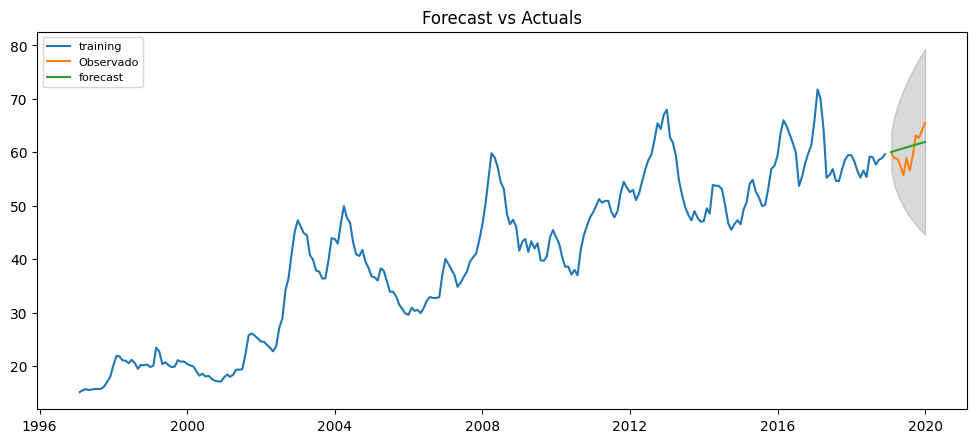

In [ ]:
#@markdown forecast h=12

# Chamar df sua base de dados e valor as observações da série

# Create Training and Test
a=len(df)-12*1
train = df.valor[:(a-1)]
test = df.valor[a:]

# Build Model
model = ARIMA(train, order=(0, 1, 1))  
fitted = model.fit()  
#print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(len(df.valor[a:]), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='Observado')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

As previsões são boas? 

Note que o valor no instante $t$ está influenciado (correlacionado) pelos valores da série nos instantes $t-1$ e $t-5$. Assim, quando fazemos a previsão para janeiro de 2020 temos informação da série do mês anterior, dezembro de 2019 $(t-1)$ e de agostos de 2019 $(t-5)$. No entanto, quando fazemos a previsão de fevereiro de 2020 já não temos informação do mês anterior (só temos a informação prevista pelo modelo)... por esse motivo as previsões tendem a acompanhar o comportamento da tendência da série (modelada pela diferença). 

### Acuracia do modelo

Algumas medidas com as quais é possível avaliar a habilidade do modelo para fazer previsões.
\
\
MAPE= $\dfrac{1}{N} \sum_t \dfrac{|forecast_t - observado_t|}{|observado_t|}$
\
\
MAE=$\dfrac{1}{N} \sum_t |forecast_t - observado_t|$
\
\
RMSE= $ \sqrt{\dfrac{1}{N} \sum_t (forecast_t - observado_t)^2}$,

em que $N$ é a quantidade de valores previstos pelo modelo.

In [ ]:
#@markdown acuracia

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast_accuracy(fc, test.values)

{'mae': 2.3589488995585994,
 'mape': 0.039743305871371835,
 'me': 0.9089595411897022,
 'mpe': 0.017204737302779938,
 'rmse': 2.7256428745821033}

**Observação** Na prática, costuma-se definir intervalos de valores de p e q, por exemplo {0,1,2,3,4,5} ajustar modelos ARIMA(p,d,q) considerando todas as combinações possíveis e escolher o modelo que minimiza, por exemplo, RMSE. O valor d do modelo ARIMA define-se verificando se é necessário ou não diferenciar a série para torná-la estacionária.

### Forecast one step 

É interessante analisar o performance do modelo e atualizamos na base de dados os valores observados a cada mês. As previsões melhoram?


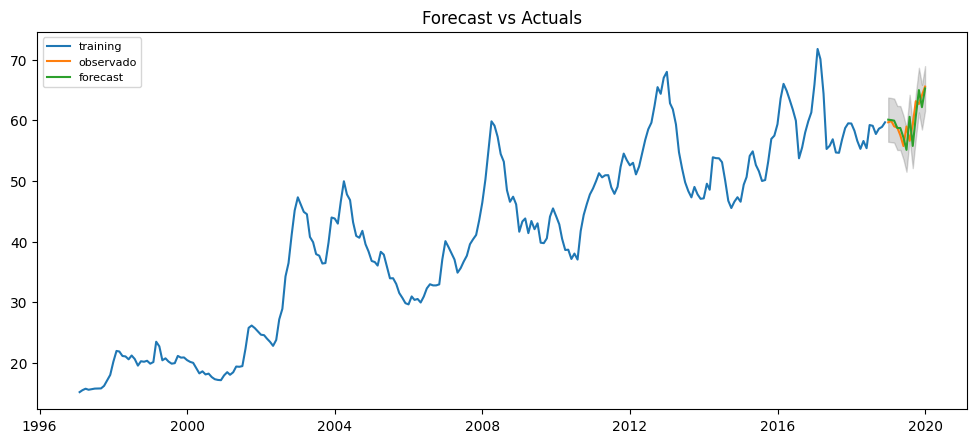

In [ ]:
#@markdown forecast atualizando cada valor observado
X = df.valor
size = 263
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
low1= list()
upper1= list()
forecast_one_step=pd.DataFrame()

for t in range(len(test)):
  model= ARIMA(history,order=(5,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=output[0]
  low=output[2][0][0]
  upper=output[2][0][1]
  predictions.append(yhat)
  low1.append(low)
  upper1.append(upper)
  obs= test[t]
  history.append(obs)

forecast_one_step["forecast"]=predictions
forecast_one_step["low"]=low1
forecast_one_step["upper"]=upper1
forecast_one_step.index=test.index


plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='observado')
plt.plot(forecast_one_step["forecast"], label='forecast')
plt.fill_between(forecast_one_step.index, forecast_one_step["low"], forecast_one_step["upper"], color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### AutoARIMA (útil para selecionar o melhor modelo)

In [ ]:
# Cuidado! muito erros com esse pacote!

# import pmdarima as pm
# model = pm.auto_arima(df.valor)
# print(model.summary())

## Exemplo 2

O conjunto de dados descreve a produção de leite (em libras por vaca) mensal ao longo de 13 anos (1962-1975).

In [ ]:
df_2 = pd.read_csv('https://www.orlandoalbarracin.com.br/phyton/milk-production.csv', parse_dates=['date'], index_col='date')
df_2

,value
date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


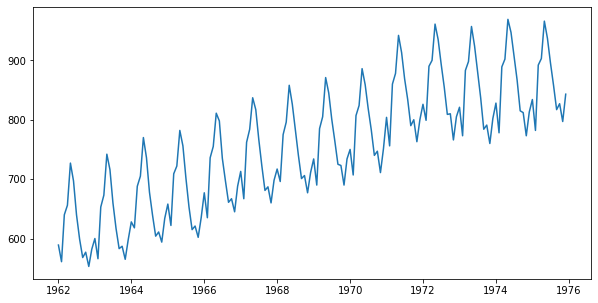

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_2);

Nota-se que a série não é estacionária. Apresenta tendência e sazonalidade.

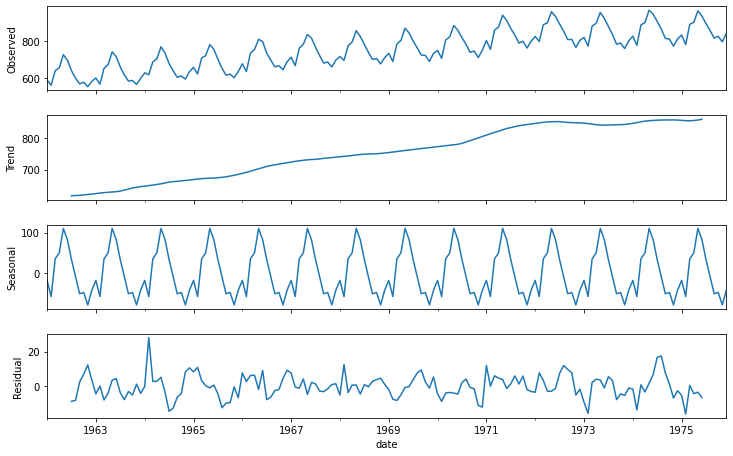

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_2)
fig=result.plot()
fig.set_size_inches((11, 7))

Observa-se um comportamento sazonal na série que se repete a cada 12 meses. Uma abordagem para modelar a tendência consiste em diferenciar a série $$ \Delta Z_t = Z_t -Z_{t-1} $$. 
Para modelar a sazonalidade pode-se realizar uma diferença sazonal 
$$\Delta Z_t = Z_t -Z_{t-12} $$


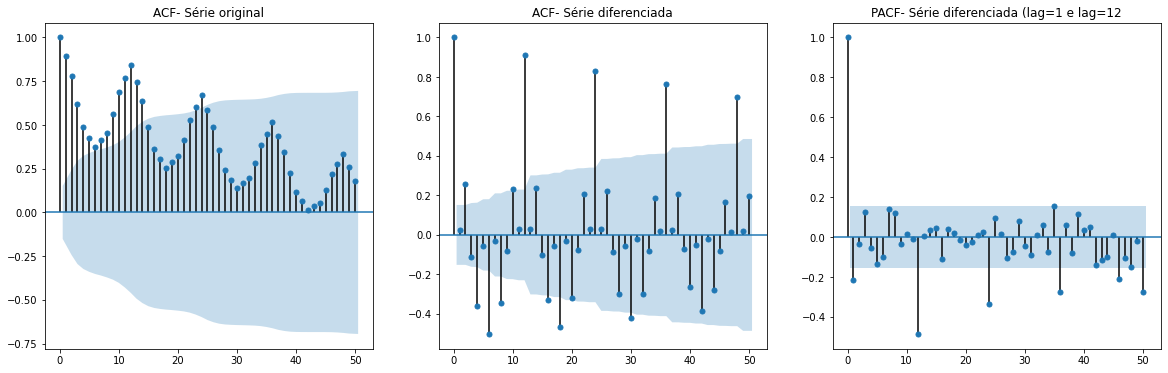

In [ ]:
# Aplicar diferenças para eliminar tendências e modelar a sazonalidade

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,6))

y=plot_acf(df_2, lags=50, ax=ax1, title="ACF- Série original")
y1=plot_acf(df_2.diff().dropna(), lags=50, ax=ax2, title="ACF- Série diferenciada")
y2=plot_pacf(df_2.diff().diff(12).dropna(), lags=50, ax=ax3, title="PACF- Série diferenciada (lag=1 e lag=12")

Nota-se no gráfico do acf da série original que o decaimento é lento indicando que a série não é estacionária. Além disso, observa-se um comportamento sazonal na correlação serial comportamento esperado em séries sazonais. No gráfico do ACF da série após uma diferença (lag=1) observa-se que os dados estão altamente correlacionados com defasagens de ordem 12, comportamento observado na decomposição da série. Por fim, no gráfico PACF da série diferenciada (lag=1), para eliminar a tendência, e (lag=12) para eliminar o efeito sazonal que seria interessante considerar considerar num modelo o efeito dos valores com defassagem 1, 12, 24 e 36.

Usaremos o modelo SARIMA que permite modelar séries com comportamentos sazonais.

In [ ]:
# Treinamento e teste 
train = df_2.iloc[:len(df_2)-12]
test = df_2.iloc[len(df_2)-12:]  # último ano para testar

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order = (0, 1, 0),  seasonal_order =(0, 1, 0, 12)) # após uma diferença (lag=1 e lag=12)
result = model.fit();

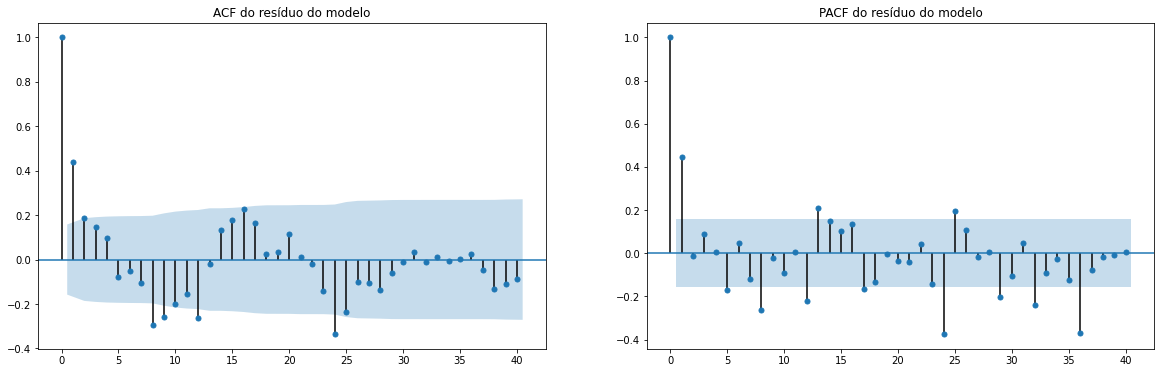

In [ ]:
#@markdown Analisando o ACF e PACF dos resíduos

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))

x=plot_acf(result.resid[14:len(df_2)],lags=40, ax=ax1,title="ACF do resíduo do modelo")
y=plot_pacf(result.resid[14:len(df_2)],lags=40,ax=ax2,title="PACF do resíduo do modelo");


Note que o PACF dos resíduos do modelo indicam que os lags 1, 12, 24 e 36 deveriam ser considerados no modelo (significativamente diferente de zero)

In [ ]:
model = SARIMAX(train, order = (1, 1, 0),  seasonal_order =(3, 1, 0, 12), trend="c") 
  
result = model.fit()
print(result.summary());

                                 Statespace Model Results                                 
Dep. Variable:                              value   No. Observations:                  156
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 12)   Log Likelihood                -488.013
Date:                            Thu, 21 Apr 2022   AIC                            988.026
Time:                                    20:06:59   BIC                           1005.803
Sample:                                01-01-1962   HQIC                           995.250
                                     - 12-01-1974                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2189      0.738     -0.297      0.767      -1.664       1.227
ar.L1         -0.2289      0.091   

Nota-se que somente os valores referentes a $Z_{t-1}$, $Z_{t-12}$, $Z_{t-24}$, $Z_{t-36}$ são significativos (ver o valor-p). 

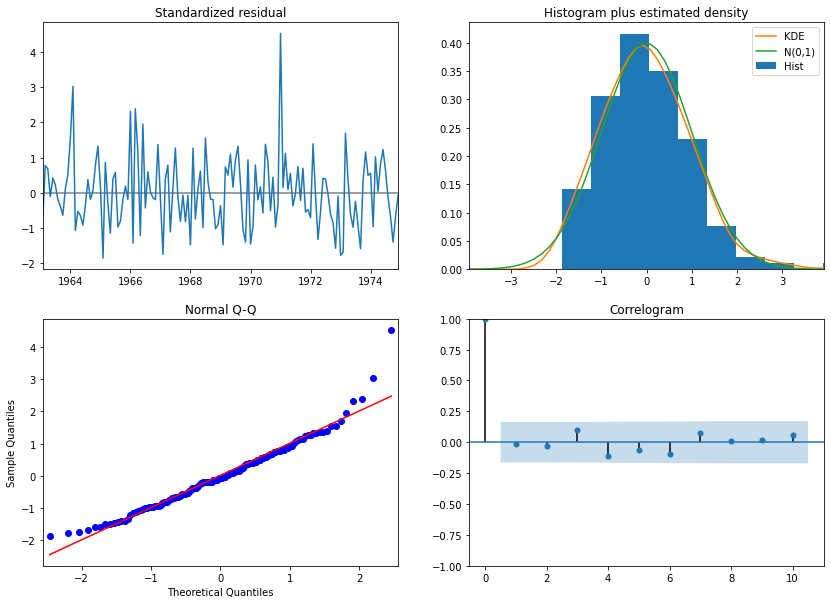

In [ ]:
diag=result.plot_diagnostics()
diag.set_size_inches((14, 10))
fig.tight_layout()

Note-se que os resíduos do modelo são não correlacionados e aparentemente seguem uma distribuição normal. 

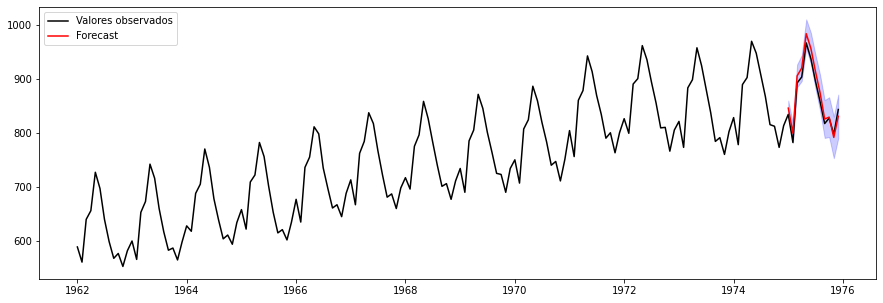

In [ ]:
#@markdown forecast 1 ano

#Checking prediction value with test
forecast = result.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
plt.figure(figsize=(15,5))
# Plot past  levels
plt.plot(df_2.index, df_2, label='Valores observados', color = 'black')
# Prediction Mean
plt.plot(d, mean, label='Forecast', color= 'red')
# Shade of space between  confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2, color= 'blue')
# Plot legend 
plt.legend()
plt.savefig('p')
plt.show()

Observa-se que as previsões acompanham o comportamento da série. 

In [ ]:
#@markdown acuracia
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

forecast=np.array(mean)
actual=np.array(test)
forecast_accuracy(forecast, actual)

{'mae': 65.60954569245195,
 'mape': 0.07627818533442583,
 'me': 10.067525792831766,
 'mpe': 0.015603619591531207,
 'rmse': 81.2206129297795}

### AutoSARIMA (útil para selecionar o melhor modelo)

In [ ]:
# Cuidado! muito erros com esse pacote!

# import pmdarima as pm
# model = pm.auto_sarima(df.valor)
# print(model.summary())